<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-16 12:21:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  65.4MB/s    in 3.1s    

2025-01-16 12:21:56 (65.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Tables in the database:
   name
0  main
First few rows of the dataset:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                  

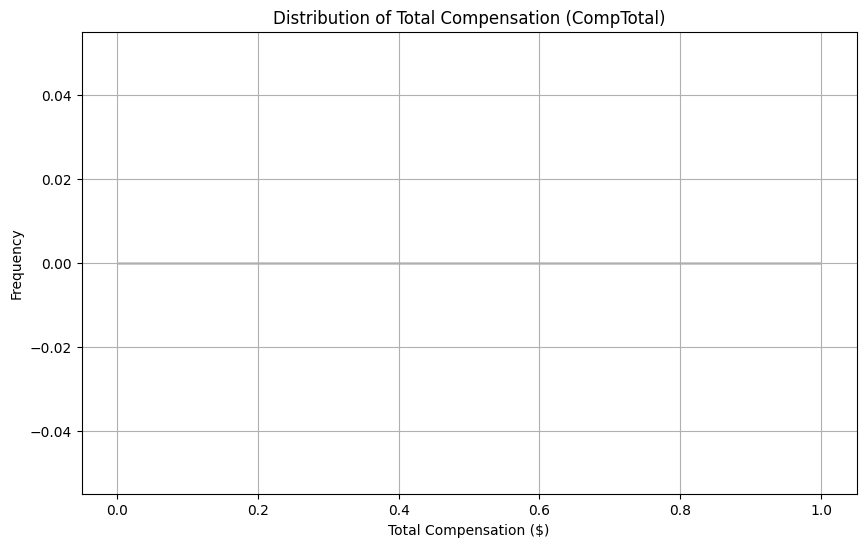

In [26]:
## Write your code here
# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: List all available tables to find the one with compensation data
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print("Tables in the database:")
print(tables)

# Step 3: Assuming we find the correct table (let's assume it is 'survey_data'), check the columns
# For now, you can modify the table name if it's different
table_name = 'main'  # Replace this with the actual table name

query = f"SELECT * FROM {table_name} LIMIT 5;"
df = pd.read_sql(query, conn)

# Display the first few rows to check the structure and the columns
print("First few rows of the dataset:")
print(df.head())

# Step 4: Plot the histogram of the CompTotal column
# We'll assume that the column storing total compensation is 'CompTotal'. If it's named differently, update the name.
if 'CompTotal' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['CompTotal'].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Total Compensation (CompTotal)')
    plt.xlabel('Total Compensation ($)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("The 'CompTotal' column was not found in the dataset.")

# Close the connection
conn.close()

    




**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


Tables in the database:
   name
0  main
First few rows of the dataset:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                  

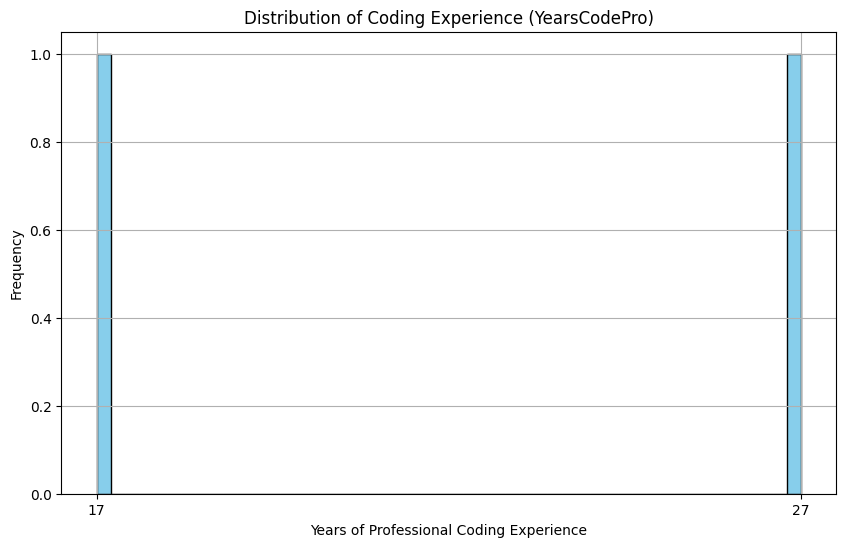

In [28]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')
# Step 2: List all available tables to find the one with coding experience data
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print("Tables in the database:")
print(tables)

# Step 3: Assuming we find the correct table (let's assume it is 'survey_data'), check the columns
# For now, you can modify the table name if it's different
table_name = 'main'  # Replace this with the actual table name

query = f"SELECT * FROM {table_name} LIMIT 5;"
df = pd.read_sql(query, conn)

# Display the first few rows to check the structure and the columns
print("First few rows of the dataset:")
print(df.head())

# Step 4: Plot the histogram of the YearsCodePro column
# We'll assume that the column storing coding experience is 'YearsCodePro'. If it's named differently, update the name.
if 'YearsCodePro' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['YearsCodePro'].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Coding Experience (YearsCodePro)')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("The 'YearsCodePro' column was not found in the dataset.")

# Close the connection
conn.close()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


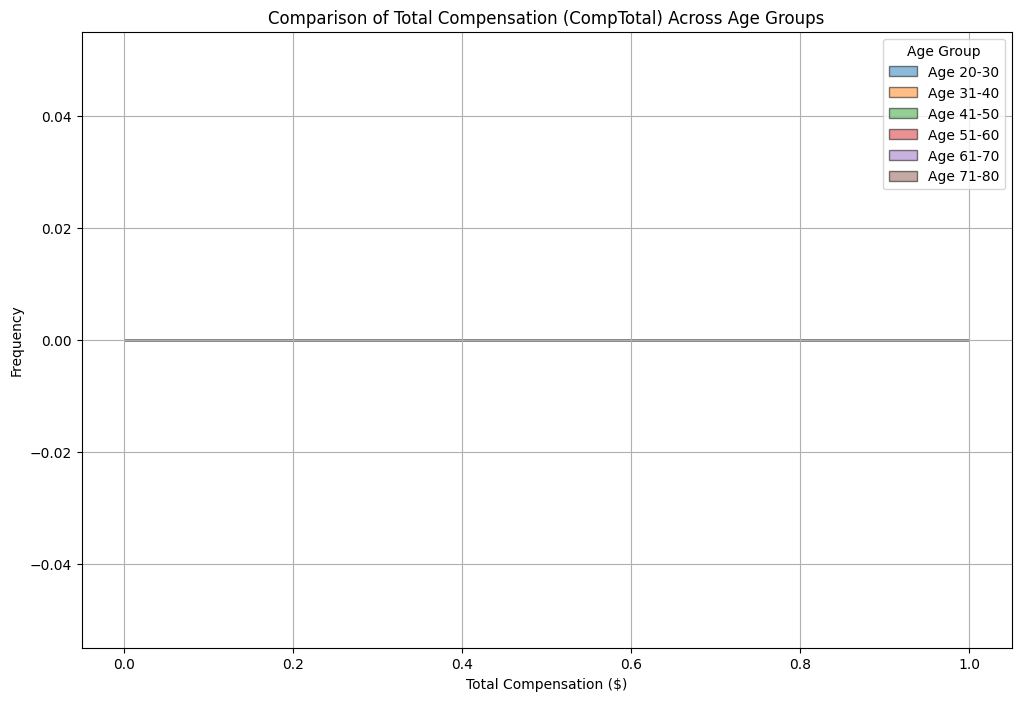

In [32]:

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the relevant columns: Age and CompTotal
query = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Convert the 'Age' column to numeric (force errors to NaN, if any)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 4: Remove any rows where Age or CompTotal is NaN after conversion
df = df.dropna(subset=['Age', 'CompTotal'])

# Step 5: Create age groups (bins) for comparison
# Define age ranges (you can adjust these bins as needed)
bins = [20, 30, 40, 50, 60, 70, 80]  
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  

# Create AgeGroup column using pd.cut
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 6: Plot histograms of CompTotal for each Age group
plt.figure(figsize=(12, 8))

# Plot a histogram for each age group
for age_group in labels:
    plt.hist(df[df['Age'] == age_group]['CompTotal'], bins=50, 
             alpha=0.5, label=f'Age {age_group}', edgecolor='black')

# Step 7: Add labels and title
plt.title('Comparison of Total Compensation (CompTotal) Across Age Groups')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency')
plt.legend(title="Age Group")
plt.grid(True)

# Step 8: Show the plot
plt.show()

# Close the connection
conn.close()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


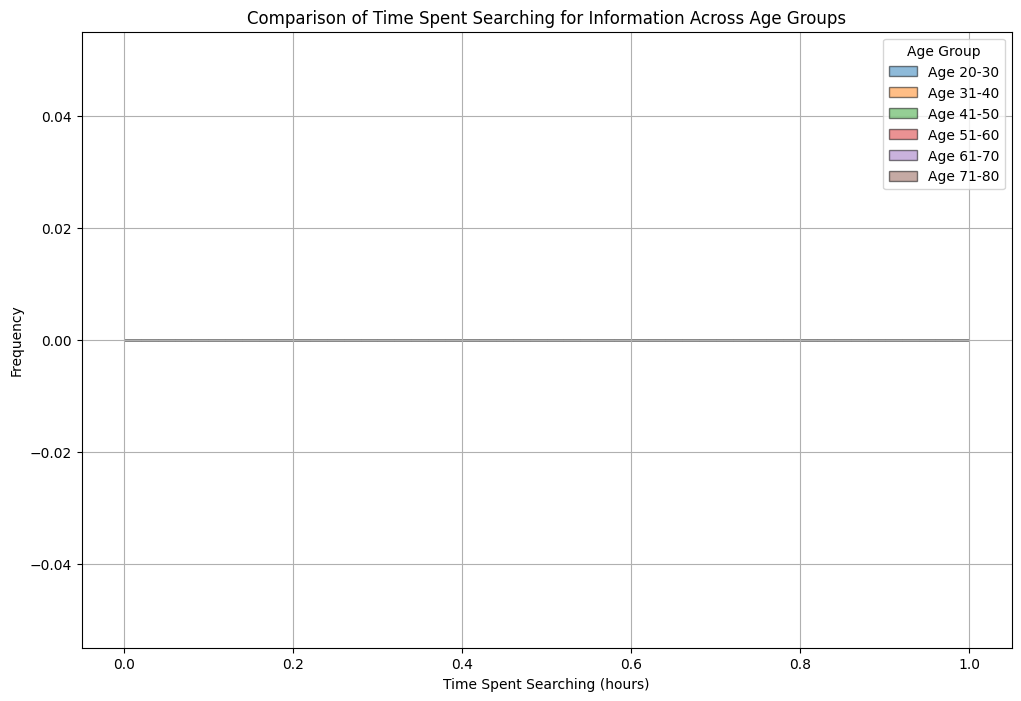

In [35]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the relevant columns: Age and TimeSearching
query = """
SELECT Age, TimeSearching 
FROM main 
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Convert 'Age' to numeric (force errors to NaN if any)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 4: Remove rows with missing 'Age' or 'TimeSearching'
df = df.dropna(subset=['Age', 'TimeSearching'])

# Step 5: Create age groups (bins) for comparison
# Define age ranges (you can adjust these bins as needed)
bins = [20, 30, 40, 50, 60, 70, 80]  
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  

# Create AgeGroup column using pd.cut
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 6: Plot histograms of TimeSearching for each Age group
plt.figure(figsize=(12, 8))

# Plot a histogram for each age group
for age_group in labels:
    plt.hist(df[df['AgeGroup'] == age_group]['TimeSearching'], bins=50, 
             alpha=0.5, label=f'Age {age_group}', edgecolor='black')

# Step 7: Add labels and title
plt.title('Comparison of Time Spent Searching for Information Across Age Groups')
plt.xlabel('Time Spent Searching (hours)')
plt.ylabel('Frequency')
plt.legend(title="Age Group")
plt.grid(True)

# Step 8: Show the plot
plt.show()

# Close the connection
conn.close()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


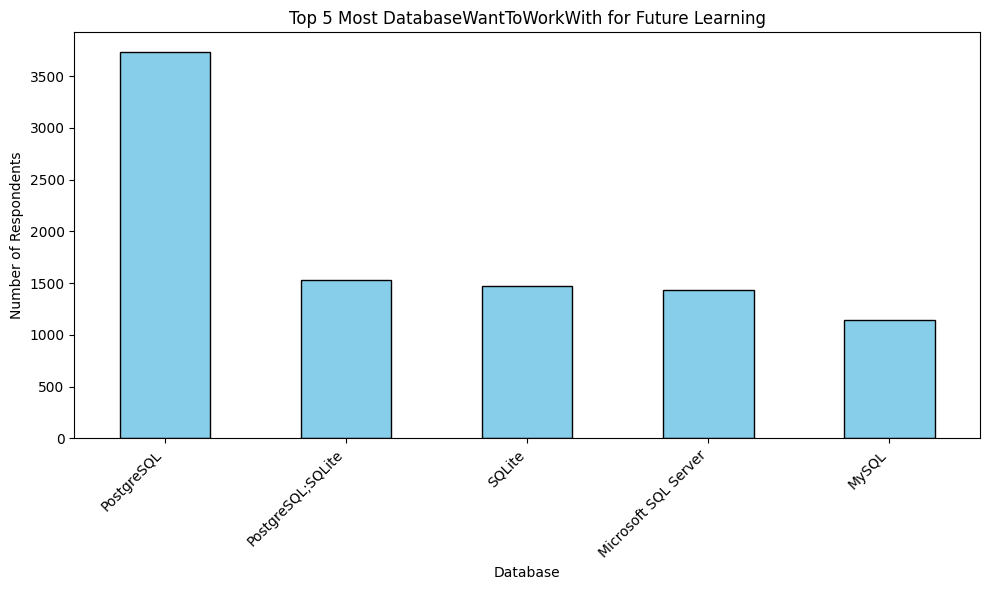

In [37]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get the database preferences (replace 'DesiredDatabases' with the correct column name)
# Assuming that the column 'DesiredDatabases' contains the database names as a list or text.
query = """
SELECT DatabaseWantToWorkWith
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Clean and split the 'DesiredDatabases' column
# Assuming 'DesiredDatabases' contains a list of databases as strings separated by commas
# If they are space-separated or semicolon-separated, adjust accordingly.
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(',')

# Step 4: Explode the lists into individual database entries
# This creates a new row for each database per respondent
databases = df['DatabaseWantToWorkWith'].explode()

# Step 5: Count the frequency of each database and get the top 5
top_databases = databases.value_counts().head(5)

# Step 6: Plot the histogram
plt.figure(figsize=(10, 6))
top_databases.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 7: Add labels and title
plt.title('Top 5 Most DatabaseWantToWorkWith for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')

# Step 8: Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


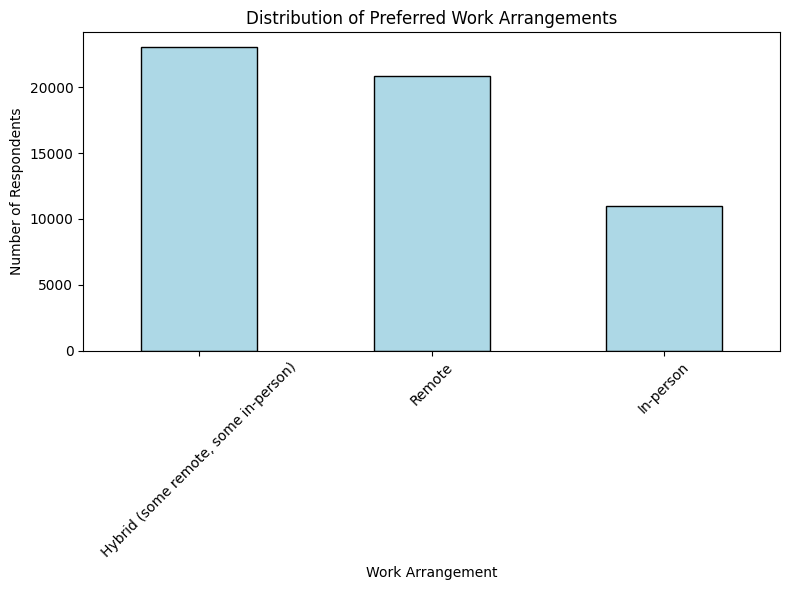

In [38]:
## Write your code here


# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get the preferred work arrangement column (replace 'PreferredWorkArrangement' with the actual column name)
query = """
SELECT RemoteWork 
FROM main 
WHERE RemoteWork IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Clean the data by standardizing values (e.g., capitalizing)
df['RemoteWork'] = df['RemoteWork'].str.strip().str.capitalize()

# Step 4: Count the frequency of each work arrangement type
work_arrangement_counts = df['RemoteWork'].value_counts()

# Step 5: Plot a histogram (bar chart)
plt.figure(figsize=(8, 6))
work_arrangement_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Step 6: Add labels and title
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

# Step 7: Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


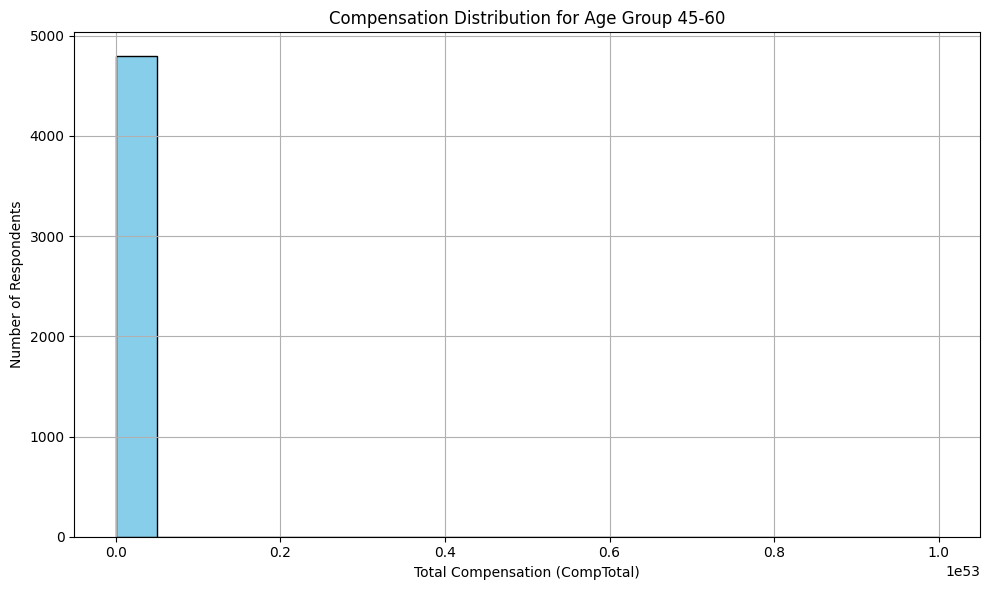

In [39]:
## Write your code here

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get the age and compensation columns
query = """
SELECT Age, CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Plot the histogram for CompTotal in the age group 45 to 60
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=20, color='skyblue', edgecolor='black')

# Step 4: Customize the plot
plt.title('Compensation Distribution for Age Group 45-60')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.grid(True)

# Step 5: Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [40]:
## Write your code here

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get the relevant columns for job satisfaction and years of experience
query = """
SELECT JobSat, YearsCodePro
FROM survey_data
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Clean the 'YearsCodePro' column by converting it to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Optionally, drop rows where YearsCodePro is NaN (if necessary)
df = df.dropna(subset=['YearsCodePro'])

# Step 4: Define bins for the years of professional coding experience
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]  # Example bins for experience
labels = ['0-5 years', '6-10 years', '11-15 years', '16-20 years', '21-25 years', '26-30 years', '31-35 years', '36-40 years']

# Step 5: Create a new column that categorizes respondents based on their years of experience
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 6: Plot histograms of JobSat for each experience group
plt.figure(figsize=(12, 8))

# Create subplots for each experience group
for i, group in enumerate(labels):
    plt.subplot(2, 4, i+1)  # 2 rows, 4 columns of subplots
    subset = df[df['ExperienceGroup'] == group]
    plt.hist(subset['JobSat'], bins=5, color='skyblue', edgecolor='black')
    plt.title(f'JobSat for {group}')
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Assuming JobSat is on a 1-5 scale

# Step 7: Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


TypeError: '<' not supported between instances of 'int' and 'str'

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
